<img style="float: right; margin: 0px 0px 30px 30px;" src="https://static.eldeber.com.bo//Files/Original/sites/eldeber/img/2018/06/26/yacuiba.jpg" width="400px" height="100px" />

### <font color='navy'> Simulación de Procesos Financieros. 

**Nombres:** 
* Bruno Isaac Pimentel Vargas
* Jesús Álvarez Castellanos 
* Jessica Nailea Ambriz Gaona

**Fecha:** 22 de marzo del 2020.


**Profesor:** Oscar David Jaramillo Zuluaga.

# Proyecto Módulo 2



### 1.1 Prevención de homicidios en México.
Para el proyecto haremos una investigación sobre los homicidios ocurridos en el país, desde el año 2000 hasta el 2018. Se obtendrá la información de la base de datos del INEGI.


### 1.2 Objetivos.
> Objetivo general:
* El objetivo principal del proyecto es conocer el sector o grupo de individuos más suceptible a ser víctima de homicidio, haciendo una predicción de cuáles son aquellos a los que el gobierno debe proteger más. Con el propósito de ayudar al Departamento de Seguridad del país a crear un plan que prevenga dichos sucesos.

> Objetivos específicos:
* Encontrar los grupos con mayor cantidad de víctimas.
* Predecir aquellos que serán vícitimas, tanto la situación en la que se daría, como qué características personales en específico tienen aquellos que son vulnerables.
* Crear simulaciones de diferentes escenarios
* Probabilidad de que cierta persona con ciertas carácteristicas sea asesinada.
* Hacer una propuesta al gobierno de cuáles son los sectores que se deben cuidar más.


### 1.3 Definición del problema.

Es preocupante como cada año en nuestro país aumentan más y más las muertes por homicidio y no podemos seguir actuando como si nada estuviera pasando.Según datos observados en diferentes titulares, en la república se han registrado en el año 2019 34,582 asesinatos, siendo la cifra más alta en los últimos 20 años. \
Investigar de forma profunda la incidencia de este delito y sus tendencias es de suma importancia, pues más que nunca, México ha estado en una situación alarmante en cuanto al tema. Ayudar es tarea de todos y para nosotros esta es una forma. \
Como ya sabemos, México es uno de los países con mayor cantidad de homicidios en el mundo, haciendo muy complicado para el Gobierno resolver esta crisis, por lo que nos hemos propuesto encontrar esos grupos más vulnerables.\


Existe una ligera idea de cuáles son esos grupos, pero sería de mucha utilidad tener certeza de ello, pues los resultados podrían sorprendernos. 

Los nodos o escenarios que utilizaremos para el proyecto son los siguientes:
* Sexo.
* Edad.
* Nacionalidad.
* Profesion o no.
 


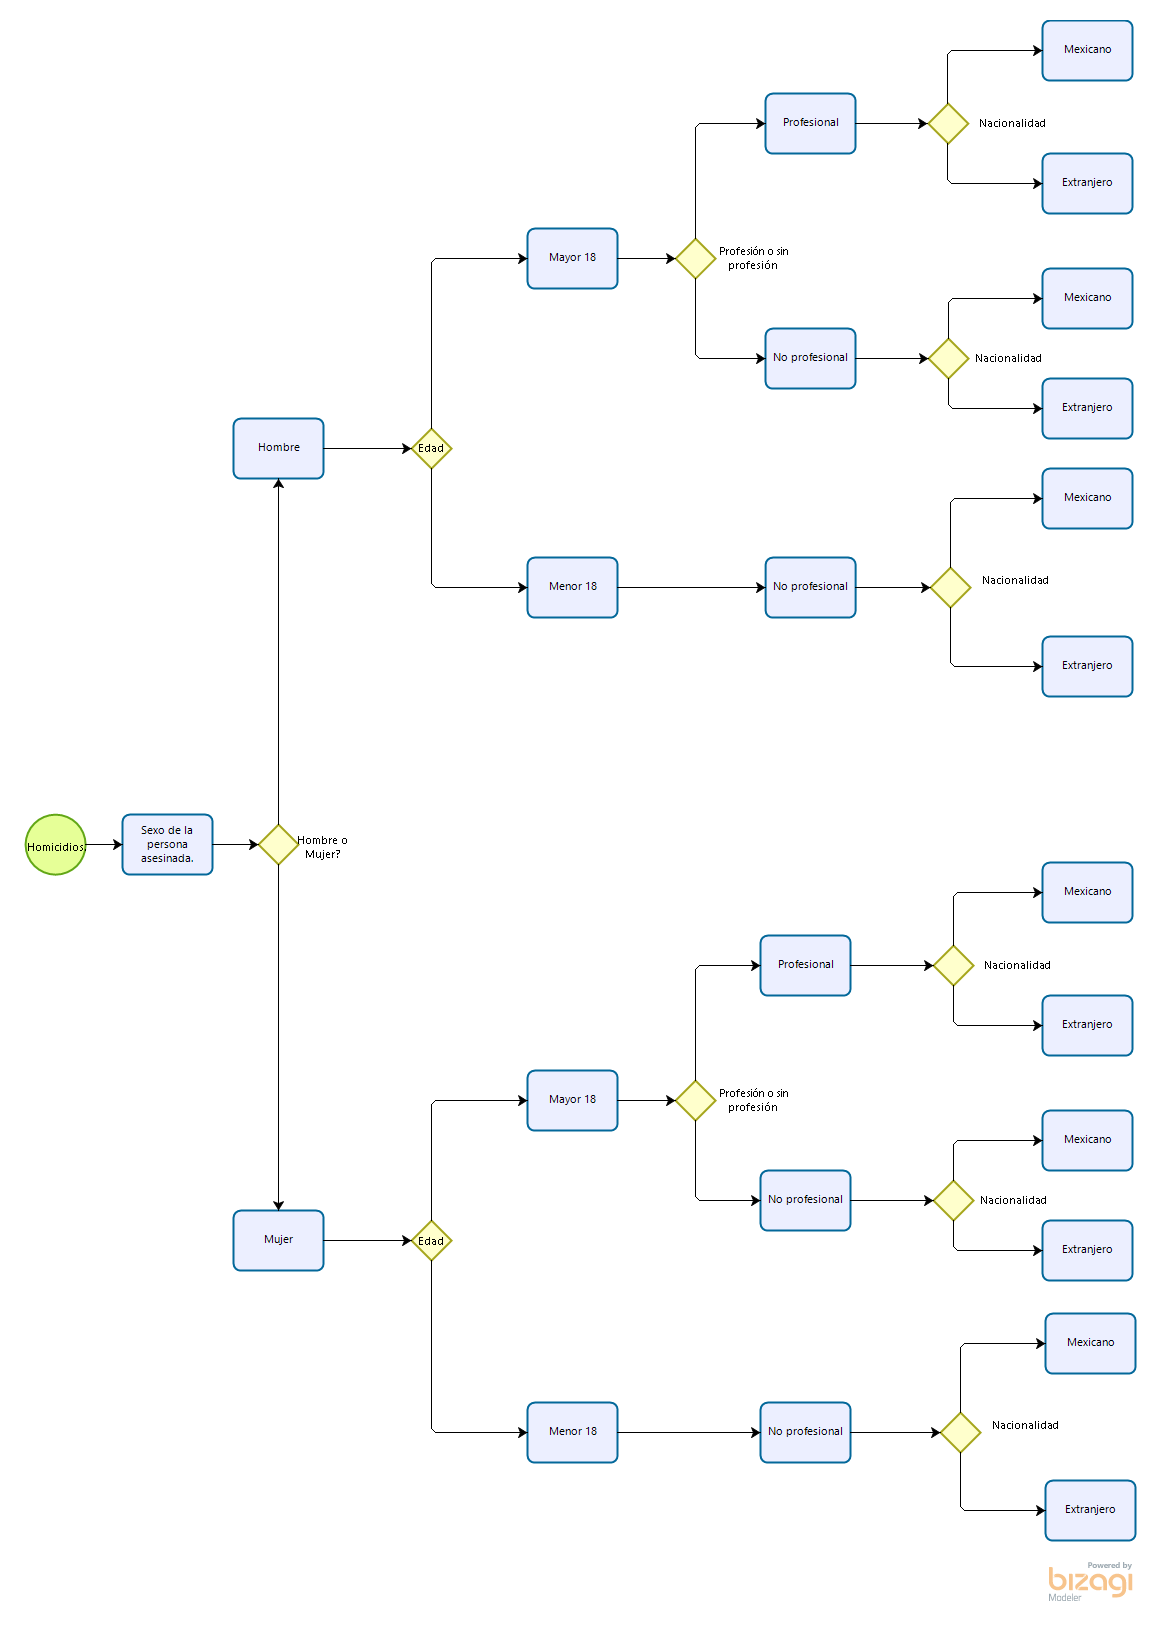

### 1.4 Nodos y variables que se decidieron simular y porqué

* **Sexo**: Elegimos el Sexo porque es muy importante saber si los hombre o las mujeres son más suceptibles.
* **Edad**: Es indispensable conocer si los menores de edad o los mayores son más suceptibles.
* **Nacionalidad**: Si es mexicano o extranjero, pues es importante ya que de esa forma podemos protegerlos más.
* **Profesión**: Lo separaremos en aquellos que tienen una profesión y los que no.


### 1.5 Definición de hipótesis y supuestos. (Pendiente para segunda entrega)
Se hará una propuesta de solución a los homicidios ocurridos en el país y para ello se tomarán en cuenta los siguientes supuestos:
   * Solo se usarán datos del 2010 al 2018, por mes.
   * No existen más condiciones o características que definan el porqué del homicidio más que los elegidos para simular.
   * Se supondrá que los homicidios se deben a estas características.
   * Los eventos son independientes.
   * Se toma por hecho que si es menor de edad, por consecuencia no tiene profesión.
   
Hipótesis: 
* Creemos que existe mayor cantidad de homicidios en personas mayores de edad, pues están más expuestas al día a día, son suceptibles a crear rivalidades.
* Actualmente ha crecido la población que tiene estudios universitarios y creemos que eso reduce en cierta forma su probabilidad de ser asesinados, pues son personas que se concentran más en sus actividades diarias y tienen mayor productividad en la sociedad. A comparación de aquellos que no tienen estudios y por lo tanto conviven en situaciones más problemáticas.

>  Para poder modelar un proceso de negocio o cualquiera otro proceso en el área de las ingenierías o ciencias sociales, después de identificar el objeto de estudio, es importante indicar cuales son los supuestos que se dan por verdaderos a lo largo de la ejecución del proceso. Estos supuestos se deben indicar en forma de variables e hipótesis (son diferentes), porque si puedes definir en un valor el supuesto lo llamaremos "supuesto constante" y si no es posible identificarlo con un número entonces será una hipótesis que afectará la construcción de los escenarios posibles del proceso.

### 1.6 Obtención de bases de datos
* La base de datos para la simulación se obtuvo del INEGI, pues ahí podemos encontrar la información necesaria en formato CSV. 
* A continuación se presenta el concentrado de los datos de la información de homicidios, está está dada por totales acumulados por meses en un periodo de 8 años, desde enero del 2010 hasta diciembre del año 2018, teniendo así un total de 96 muestras.
    La información está separada en cuatro nodos, los cuales presentán las siguientes categorías:
    * Sexo: La persona era hombre o mujer.
    * Edad: La persona era mayor de edad o menor de edad.
    * Nacionalidad: La persona era Mexicana o extranjera.
    * Escolaridad: La persona era profesional o no.
    

#### Funciones e importación de datos.

In [116]:
from __future__ import division
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [142]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import optimize as opt
data = pd.read_excel('DB_homicidios.xlsx')
sexo = data.iloc[:,1:3]
edad = data.iloc[:,3:9]
nacionalidad = data.iloc[:,9:15]
profesional = data.iloc[:,15:]

In [115]:
def display_animation(ani,default_mode=None):
    from IPython.display import HTML
    return HTML(ani.to_jshtml())

Funcion que nos arrojará la distribución que más se adapte a nuestros datos.

In [117]:
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.nakagami,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

Los datos con los que estaremos trabajando a lo largo del proyecto son los siguientes.

In [5]:
data.head()

Unnamed: 0  Hombre  Mujer  Hombre Menor de edad  Mujer Menor de edad  \
0 2010-01-01    1764    170                   159                   31   
1 2010-02-01    1520    151                   156                   39   
2 2010-03-01    1852    160                   170                   38   
3 2010-04-01    1834    201                   214                   41   
4 2010-05-01    1966    184                   175                   30   

   No especificado  Hombre Mayor de edad  Mujer Mayor de edad  \
0                1                  1565                  136   
1                0                  1331                  110   
2                1                  1620                  119   
3                1                  1568                  155   
4                0                  1742                  151   

   No especificado.1  Hombre Mexicano  ...  No especificado.2  \
0                  1             1752  ...                9.0   
1                  3             1506  ...                3.0   
2                  1             1838  ...                4.0   
3                  1             1818  ...                2.0   
4                  0             1956  ...                1.0   

   Hombre Extraanjero  Mujer Extranjera   No especificado  \
0                  12               1.0                 0   
1                  14               0.0                 0   
2                  14               3.0                 0   
3                  16               4.0                 0   
4                  10               2.0                 0   

   Hombre  Profesional  Mujer Profesional  No especificado.3  \
0                  115                 13                  0   
1                   86                 18                  0   
2                  115                 10                  0   
3                  108                 16                  0   
4                  127                 19                  0   

   Hombre No profesional  Mujer No profesional  No especificado.4  
0                   1411                   143                  4  
1                   1194                   116                  0  
2                   1393                   120                  1  
3                   1403                   146                  1  
4                   1487                   137                  0  

[5 rows x 21 columns]

Como podemos ver en nuestra base de datos, se trata de datos cuantitativos del tipo discreto, porque son un conteo que no se puede hacer más preciso, son números enteros.

#### Analizando la distribución.

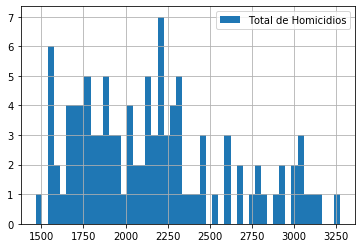

In [6]:
sexo['Total']= sexo['Hombre']+sexo['Mujer']
plt.hist(sexo['Total'], bins=50, label='Total de Homicidios')
plt.grid()
plt.legend(loc='best')
plt.show()

Aquí vemos el histograma de nuestros datos totales viendolo desde su sexo, más adelante analizaremos cada uno de ellos por separado.

In [118]:
ani = getHistBinNumAni(sexo['Total'])
display_animation(ani, default_mode='once')

NameError: name 'getHistBinNumAni' is not defined

In [8]:
ani = getKdeRectAni(sexo['Total'])
display_animation(ani, default_mode='once')

NameError: name 'getKdeRectAni' is not defined

>> ### Nodo 1: Sexo de las victimas

> #### <font color = "blue"> Hombres

In [9]:
ani = getHistBinNumAni(sexo['Hombre'])
display_animation(ani, default_mode='once')

NameError: name 'getHistBinNumAni' is not defined

In [10]:
sexo['Hombre_Ptg']= sexo['Hombre']/sexo['Total']
ani = getHistBinNumAni(sexo['Hombre_Ptg'])
display_animation(ani, default_mode='once')

NameError: name 'getHistBinNumAni' is not defined

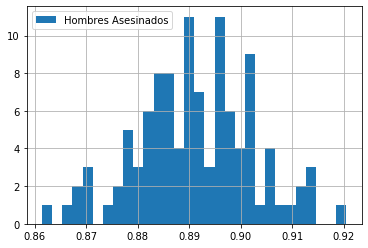

In [11]:
plt.hist(sexo['Hombre_Ptg'], bins=30, label='Hombres Asesinados')
plt.grid()
plt.legend(loc='best')
plt.show()

Vemos en este histograma que la cantidad de hombres asesinados sigue una distribución normal a simple vista, pero utilizaremos otras formas para confirmarlo.

In [12]:
best_fit_distribution(sexo['Hombre_Ptg'])

('norm', (0.0, 1.0))

Al usar esta función nos ha sugerido que la mejor distribución que se adapta a nuestros datos es efectivamente la Normal, así que concuerda con lo visto en el histograma, pero lo confirmaremos de nuevo haciendo la Prueba de Normalidad.

Nuestra prueba de hipótesis Ho es que es una distribución normal, a continuación la validaremos:

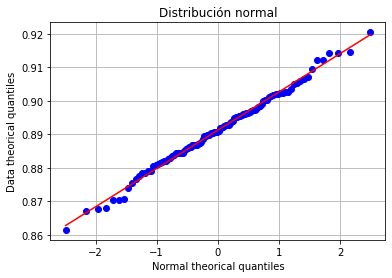

In [13]:
st.probplot(sexo['Hombre_Ptg'],dist="norm",plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()


Efectivamente es una distribución normal, por lo que aceptamos la prueba de hipótesis.

> #### <font color = "blue"> Mujeres

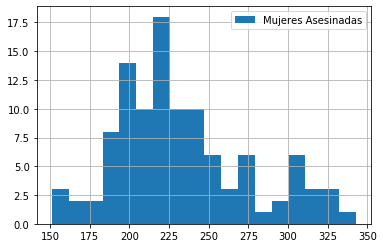

In [14]:
plt.hist(sexo['Mujer'], bins=18, label='Mujeres Asesinadas')
plt.grid()
plt.legend(loc='best')
plt.show()

Con el histograma de las mujeres asesinadas vemos que también sigue una distribución normal, pero lo confirmaremos a continuación.

In [15]:
sexo['Mujer_Ptg']= sexo['Mujer']/sexo['Total']
ani = getHistBinNumAni(sexo['Mujer_Ptg'])
display_animation(ani, default_mode='once')

NameError: name 'getHistBinNumAni' is not defined

In [16]:
best_fit_distribution(sexo['Mujer_Ptg'])

('norm', (0.0, 1.0))

La función también sugiere Distribución Normal.

Nuestra prueba de hipótesis Ho de la Prueba de Normalidad es que es una distribución normal, a continuación la validaremos:

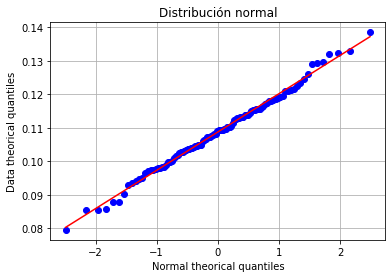

In [17]:
st.probplot(sexo['Mujer_Ptg'],dist="norm",plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()


 Efectivamente se trata de una distribución normal, pues nuestros datos se ajustanmuy cercanamente a la linea, por lo que aceptamos la prueba de hipótesis.

#### Nodo 1: Simulación
> #### <font color = "blue"> Hombres

In [18]:
n=[10,1000,10000,100000,1000000]
SimHombre =   list(map(lambda n:np.random.normal(np.mean(sexo['Hombre_Ptg']),np.std(sexo['Hombre_Ptg']),n),n))
SimPtgHombre = list(map(lambda x: np.mean(x),SimHombre)) 
dats1 = pd.DataFrame(data={'Simulaciones':SimPtgHombre},index=n)
dats1

Simulaciones
10           0.895346
1000         0.891789
10000        0.891142
100000       0.891241
1000000      0.891221

Aquí se realizó una simulación con 10,1 000,10 000,100 000 y 1 000 000 de datos aleatorios que siguen la distribución normal, para encontrar el porcentaje de hombres del total que se calcula serán asesinados. Los resultados son muy cercanos entre uno y otro, diciéndonos que el porcentaje de hombres asesinados será de 89.122%

> #### <font color = "blue"> Mujeres

In [19]:
n=[10,1000,10000,100000,1000000]
SimMujer =   list(map(lambda n:np.random.normal(np.mean(sexo['Mujer_Ptg']),np.std(sexo['Mujer_Ptg']),n),n))
SimPtgMujer = list(map(lambda x: np.mean(x),SimMujer)) 
dats2 = pd.DataFrame(data={'Simulaciones':SimPtgMujer},index=n)
dats2

Simulaciones
10           0.108576
1000         0.108544
10000        0.108644
100000       0.108787
1000000      0.108791

Aquí de igual forma se realizó una simulación con 10,1 000,10 000,100 000 y 1 000 000 de datos aleatorios que siguen la distribución normal, para encontrar el porcentaje de mujeres del total que se calcula serán asesinadas. Los resultados son muy cercanos entre uno y otro, diciéndonos que el porcentaje de mujeres asesinadas será de 10.876%

>> ### Nodo 2: Edades.

In [20]:
edad['Total']=edad.sum(axis=1)
edad.head()

Hombre Menor de edad  Mujer Menor de edad  No especificado  \
0                   159                   31                1   
1                   156                   39                0   
2                   170                   38                1   
3                   214                   41                1   
4                   175                   30                0   

   Hombre Mayor de edad  Mujer Mayor de edad  No especificado.1  Total  
0                  1565                  136                  1   1893  
1                  1331                  110                  3   1639  
2                  1620                  119                  1   1949  
3                  1568                  155                  1   1980  
4                  1742                  151                  0   2098

> #### <font color = "blue"> Hombres menores de edad

In [21]:
edad['Hombre_menor_Ptg']= edad['Hombre Menor de edad']/edad['Total']
ani = getHistBinNumAni(edad['Hombre_menor_Ptg'])
display_animation(ani, default_mode='once')

NameError: name 'getHistBinNumAni' is not defined

In [22]:
edad['Hombre_menor_Ptg'].mean()

0.08320387795484352

In [39]:
ani = getKdeRectAni(edad['Hombre_menor_Ptg'])
display_animation(ani, default_mode='once')

NameError: name 'getKdeRectAni' is not defined

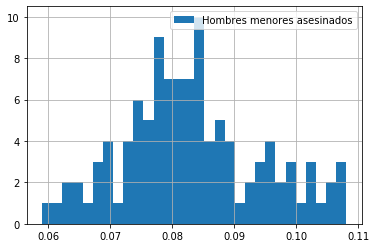

In [23]:
plt.hist(edad['Hombre_menor_Ptg'], bins=30, label='Hombres menores asesinados')
plt.grid()
plt.legend(loc='best')
plt.show()

El histograma nos muestra que los datos de Hombres menores de edad que fueron asesinados tienen una distribución normal, pero es a simple vista, así que lo verificaremos con la función creada.

In [24]:
best_fit_distribution(edad['Hombre_menor_Ptg'])

('norm', (0.0, 1.0))

Efectivamente nos dice que es una distribución normal.

Por último lo comprobamos con la prueba de normalidad.

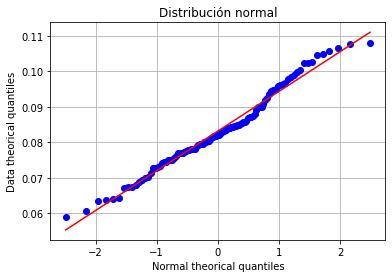

In [25]:
st.probplot(edad['Hombre_menor_Ptg'],dist="norm",plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()


Los datos están muy cercanos a la linea roja, lo que nos dice que el modelo ajusta a nuestros datos.

> #### <font color = "blue"> Mujeres menores de edad

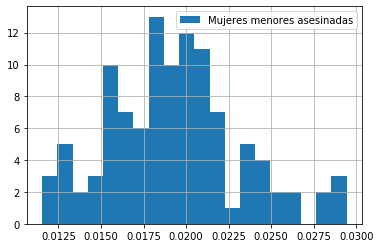

In [26]:
edad['Mujer_menor_Ptg']= edad['Mujer Menor de edad']/edad['Total']
plt.hist(edad['Mujer_menor_Ptg'], bins=20, label='Mujeres menores asesinadas')
plt.grid()
plt.legend(loc='best')
plt.show()

Como vemos en este histograma de nuestros datos sobre las mujeres menores de edad asesinadas, podemos darnos cuenta que tienen una distribución normal, así que lo comprobaremos.

In [33]:
ani = getHistBinNumAni(edad['Mujer_menor_Ptg'])
display_animation(ani, default_mode='once')

NameError: name 'getHistBinNumAni' is not defined

In [27]:
edad['Mujer_menor_Ptg'].mean()

0.019327967568043603

In [35]:
ani = getKdeRectAni(edad['Mujer_menor_Ptg'])
display_animation(ani, default_mode='once')

NameError: name 'getKdeRectAni' is not defined

La función que a continuación usaremos nos dirá qué distribución es la correcta según sus parámetros.

In [28]:
best_fit_distribution(edad['Mujer_menor_Ptg'])

('norm', (0.0, 1.0))

Haremos ahora una prueba de normalidad donde veremos si aceptamos la prueba de hipótesis Ho que nos dice que es una distribucion normal.

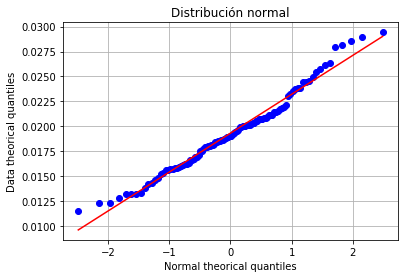

In [29]:
st.probplot(edad['Mujer_menor_Ptg'],dist="norm",plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

Los datos son muy acercados a la linea, así que aceptamos Ho.

> #### <font color = "blue"> Hombres mayores de edad

Con el siguiente histograma trataremos de saber la distribución de los datos.

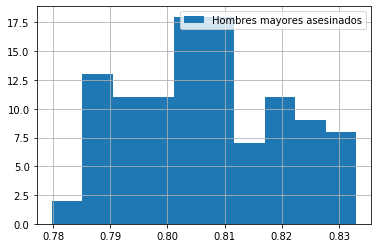

In [30]:
edad['Hombre_mayor_Ptg']= edad['Hombre Mayor de edad']/edad['Total']
plt.hist(edad['Hombre_mayor_Ptg'], bins=10, label='Hombres mayores asesinados')
plt.grid()
plt.legend(loc='best')
plt.show()

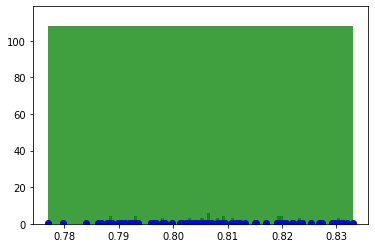

In [53]:
ani = getHistBinNumAni(edad['Hombre_mayor_Ptg'])
display_animation(ani, default_mode='once')

In [52]:
edad['Hombre_mayor_Ptg'].mean()

0.8066699666454658

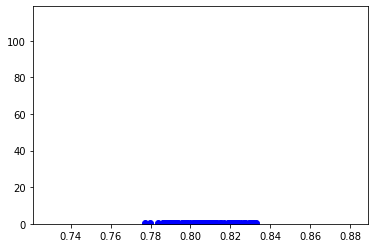

In [55]:
ani = getKdeRectAni(edad['Hombre_mayor_Ptg'])
display_animation(ani, default_mode='once')

In [31]:
best_fit_distribution(edad['Hombre_mayor_Ptg'])

('norm', (0.0, 1.0))

La función también nos dice que la distribución normal es la adecuada.

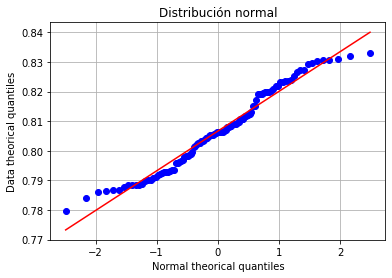

In [32]:
st.probplot(edad['Hombre_mayor_Ptg'],dist="norm",plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

Gracias a la prueba de normalidad vemos que sus datos se acercan mucho a la linea, por lo que decimos que la distribución normal ajusta perfectamente a los datos.

> #### <font color = "blue"> Mujeres mayores de edad

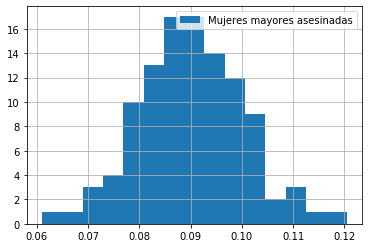

In [33]:
edad['Mujer_mayor_Ptg']= edad['Mujer Mayor de edad']/edad['Total']
plt.hist(edad['Mujer_mayor_Ptg'], bins=15, label='Mujeres mayores asesinadas')
plt.grid()
plt.legend(loc='best')
plt.show()

El histograma nos sugiere distribución normal según su forma, lo confirmaremos a continuación.

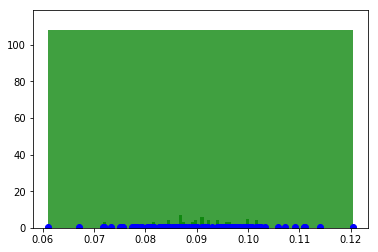

In [18]:
ani = getHistBinNumAni(edad['Mujer_mayor_Ptg'])
display_animation(ani, default_mode='once')

In [34]:
edad['Mujer_mayor_Ptg'].mean()

0.09022845348208507

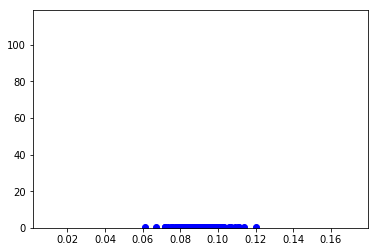

In [20]:
ani = getKdeRectAni(edad['Mujer_mayor_Ptg'])
display_animation(ani, default_mode='once')

In [35]:
best_fit_distribution(edad['Mujer_mayor_Ptg'])

('norm', (0.0, 1.0))

La función también lo sugiere.

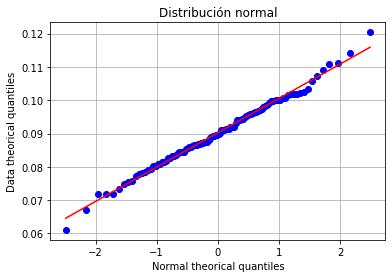

In [36]:
st.probplot(edad['Mujer_mayor_Ptg'],dist="norm",plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

Por último con la prueba de normalidad lo podemos confirmar, se trata de una distribución normal.

#### Nodo 2: Simulación

In [37]:
n=[10,1000,10000,100000,1000000]
SimHombre =   list(map(lambda n:np.random.normal(np.mean(edad['Hombre_menor_Ptg']),np.std(sexo['Hombre_menor_Ptg']),n),n))
SimPtgHombre = list(map(lambda x: np.mean(x),SimHombre)) 
dats1 = pd.DataFrame(data={'Simulaciones':SimPtgHombre},index=n)
dats1



KeyError: 'Hombre_menor_Ptg'

>> ### Nodo 3: Nacionalidad.

In [105]:
nacionalidad['Total']=nacionalidad.sum(axis=1)
nacionalidad.head()

Hombre Mexicano  Mujer Mexicana  No especificado.2  Hombre Extraanjero  \
0             1752             169                9.0                  12   
1             1506             151                3.0                  14   
2             1838             157                4.0                  14   
3             1818             197                2.0                  16   
4             1956             182                1.0                  10   

   Mujer Extranjera   No especificado   Total  
0                 1                 0  1943.0  
1                 9                 0  1683.0  
2                 3                 0  2016.0  
3                 4                 0  2037.0  
4                 8                 0  2157.0

> #### <font color = "blue"> Hombres Mexicanos.

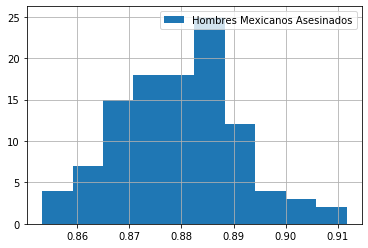

In [53]:
nacionalidad['Hombre_mex_Ptg']= nacionalidad['Hombre Mexicano']/nacionalidad['Total']
plt.hist(nacionalidad['Hombre_mex_Ptg'], bins=10, label='Hombres Mexicanos Asesinados')
plt.grid()
plt.legend(loc='best')
plt.show()

La forma que presenta el histograma nos sugiere que los datos tienen una distribución normal de probabilidad.

In [ ]:
ani = getHistBinNumAni(nacionalidad['Hombre_mex_Ptg'])
display_animation(ani, default_mode='once')

In [ ]:
ani = getKdeRectAni(nacionalidad['Hombre_mex_Ptg'])
display_animation(ani, default_mode='once')

In [54]:
best_fit_distribution(nacionalidad['Hombre_mex_Ptg'])

('norm', (0.0, 1.0))

La función también nos muestra que la distribución normal es la adecuada.

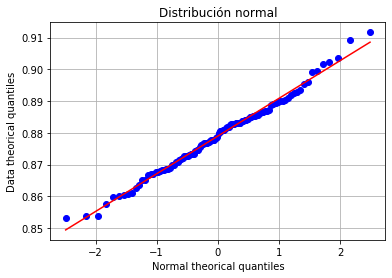

In [55]:
st.probplot(nacionalidad['Hombre_mex_Ptg'],dist="norm",plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

Por último, la prueba de normalidad nos dice que se acepta Ho, que nos dice que efectivamente es una distribución normal.

> #### <font color = "blue"> Mujeres Mexicanas

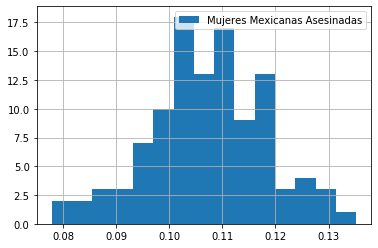

In [56]:
nacionalidad['Mujer_mex_Ptg']= nacionalidad['Mujer Mexicana']/nacionalidad['Total']
plt.hist(nacionalidad['Mujer_mex_Ptg'], bins=15, label='Mujeres Mexicanas Asesinadas')
plt.grid()
plt.legend(loc='best')
plt.show()

El histograma es muy claro, es casi seguro que se trata de una distribución normal, se confirmará con las otras pruebas.

In [ ]:
ani = getHistBinNumAni(nacionalidad['Mujer_mex_Ptg'])
display_animation(ani, default_mode='once')

In [ ]:
ani = getKdeRectAni(nacionalidad['Mujer_mex_Ptg'])
display_animation(ani, default_mode='once')

In [57]:
best_fit_distribution(nacionalidad['Mujer_mex_Ptg'])

('norm', (0.0, 1.0))

Nos confirma que es normal.

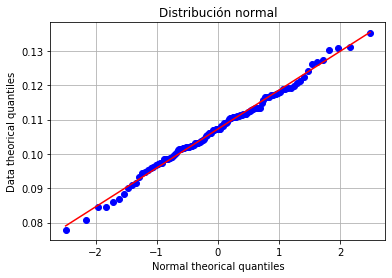

In [58]:
st.probplot(nacionalidad['Mujer_mex_Ptg'],dist="norm",plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

La prueba de normalidad también nos muestra que efectivamente se trata de Distribución Normal.

> #### <font color = "blue"> Hombres Extranjeros.

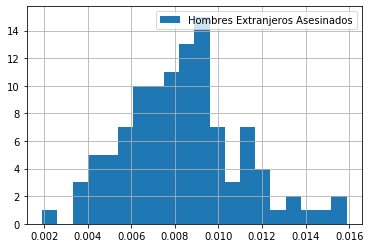

In [68]:
nacionalidad['Hombres_ext_Ptg']= nacionalidad['Hombre Extraanjero']/nacionalidad['Total']
plt.hist(nacionalidad['Hombres_ext_Ptg'], bins=20, label='Hombres Extranjeros Asesinados')
plt.grid()
plt.legend(loc='best')
plt.show()

El histograma tiene la forma de una distribución normal, se confirmará despúes.

In [ ]:
ani = getHistBinNumAni(nacionalidad['Hombres_ext_Ptg'])
display_animation(ani, default_mode='once')

In [ ]:
ani = getKdeRectAni(nacionalidad['Hombres_ext_Ptg'])
display_animation(ani, default_mode='once')

In [69]:
best_fit_distribution(nacionalidad['Hombres_ext_Ptg'])

('norm', (0.0, 1.0))

La función también sugiere Distribución Normal.

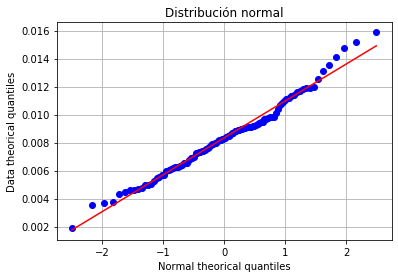

In [70]:
st.probplot(nacionalidad['Hombres_ext_Ptg'],dist="norm",plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

En este caso, la prueba de normalidad no arroja un resultado tan exacto, pues en las colas vemos que los datos no se ajustan a la perfección, pero es muy poco, así que basándonos también en las pruebas anteriores decidimos usar la distribución normal.

> #### <font color = "blue"> Mujeres Extranjeras.

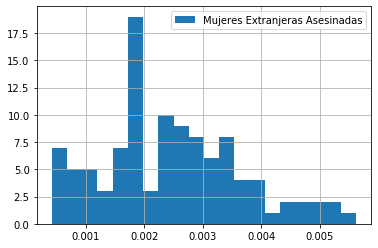

In [107]:
nacionalidad['Mujeres_ext_Ptg']= nacionalidad['Mujer Extranjera']/nacionalidad['Total']
plt.hist(nacionalidad['Mujeres_ext_Ptg'], bins=20, label='Mujeres Extranjeras Asesinadas')
plt.grid()
plt.legend(loc='best')
plt.show()

El histograma tiene una forma como la distribución normal, así que creemos que esa es la adecuada, pero será confirmado a continuación.

In [ ]:
ani = getHistBinNumAni(nacionalidad['Mujeres_ext_Ptg'])
display_animation(ani, default_mode='once')

In [ ]:
ani = getKdeRectAni(nacionalidad['Mujeres_ext_Ptg'])
display_animation(ani, default_mode='once')

In [108]:
best_fit_distribution(nacionalidad['Mujeres_ext_Ptg'])

('norm', (0.0, 1.0))

La función lo confirma.

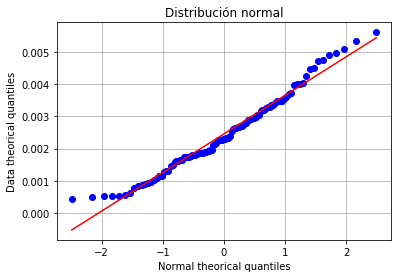

In [109]:
st.probplot(nacionalidad['Mujeres_ext_Ptg'],dist="norm",plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

En la prueba de normalidad podemos ver que hay ciertos datos que no se ajustan muy bien a la distribución normal, pero son muy pocos, así que decidimos ignorarlos y concluir que si se trata de distribución normal, pues las otras pruebas también así lo concluían.

#### Nodo 3: Simulación

>> ### Nodo 4: Profesional o No

In [143]:
profesional['Total']=profesional.sum(axis=1)
profesional.head()

Hombre  Profesional  Mujer Profesional  No especificado.3  \
0                  115                 13                  0   
1                   86                 18                  0   
2                  115                 10                  0   
3                  108                 16                  0   
4                  127                 19                  0   

   Hombre No profesional  Mujer No profesional  No especificado.4  Total  
0                   1411                   143                  4   1686  
1                   1194                   116                  0   1414  
2                   1393                   120                  1   1639  
3                   1403                   146                  1   1674  
4                   1487                   137                  0   1770

> #### <font color = "blue"> Hombre Profesional

In [132]:
profesional['Hombre_prof_Ptg']= profesional['Hombre Profesional']/profesional['Total']
plt.hist(profesional['Hombre_prof_Ptg'], bins=15, label='Hombres Profesionales Asesinados')
plt.grid()
plt.legend(loc='best')
plt.show()

KeyError: 'Hombre Profesional'

In [ ]:
ani = getHistBinNumAni(profesional['Hombre_prof_Ptg'])
display_animation(ani, default_mode='once')

In [ ]:
ani = getKdeRectAni(profesional['Hombre_prof_Ptg'])
display_animation(ani, default_mode='once')

In [ ]:
best_fit_distribution(profesional['Hombre_prof_Ptg'])

In [ ]:
st.probplot(profesional['Hombre_prof_Ptg'],dist="norm",plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

> #### <font color = "blue"> Mujer Profesional

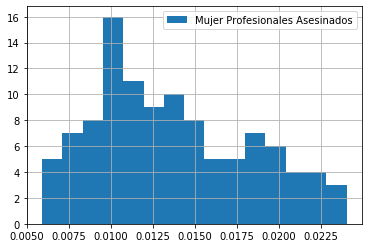

In [145]:
profesional['Mujer_prof_Ptg']= profesional['Mujer Profesional']/profesional['Total']
plt.hist(profesional['Mujer_prof_Ptg'], bins=15, label='Mujer Profesionales Asesinados')
plt.grid()
plt.legend(loc='best')
plt.show()

In [ ]:
El histograma muestra algunos datos 

In [ ]:
ani = getHistBinNumAni(profesional['Mujer_prof_Ptg'])
display_animation(ani, default_mode='once')

In [ ]:
ani = getKdeRectAni(profesional['Mujer_prof_Ptg'])
display_animation(ani, default_mode='once')

In [122]:
best_fit_distribution(profesional['Mujer_prof_Ptg'])

('norm', (0.0, 1.0))

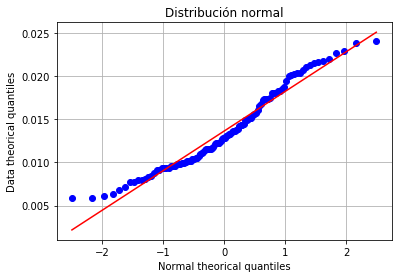

In [146]:
st.probplot(profesional['Mujer_prof_Ptg'],dist="norm",plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

> #### <font color = "blue"> Hombre No Profesional

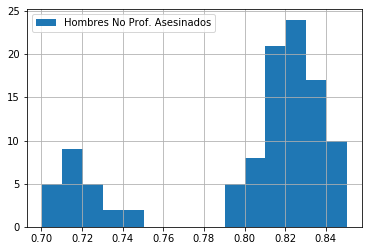

In [144]:
profesional['Hombre_noprof_Ptg']= profesional['Hombre No profesional']/profesional['Total']
plt.hist(profesional['Hombre_noprof_Ptg'], bins=15, label='Hombres No Prof. Asesinados')
plt.grid()
plt.legend(loc='best')
plt.show()

In [ ]:
ani = getHistBinNumAni(profesional['Hombre_noprof_Ptg'])
display_animation(ani, default_mode='once')

In [ ]:
ani = getKdeRectAni(profesional['Hombre_noprof_Ptg'])
display_animation(ani, default_mode='once')

In [125]:
best_fit_distribution(profesional['Hombre_noprof_Ptg'])

('norm', (0.0, 1.0))

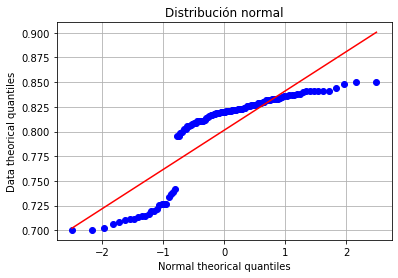

In [126]:
st.probplot(profesional['Hombre_noprof_Ptg'],dist="",plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

> #### <font color = "blue"> Mujer No Profesional

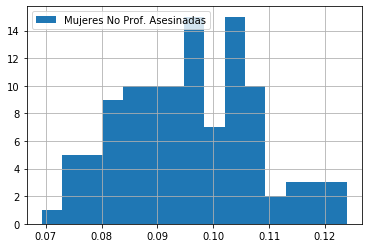

In [127]:
profesional['Mujer_noprof_Ptg']= profesional['Mujer No profesional']/profesional['Total']
plt.hist(profesional['Mujer_noprof_Ptg'], bins=15, label='Mujeres No Prof. Asesinadas')
plt.grid()
plt.legend(loc='best')
plt.show()

In [ ]:
ani = getHistBinNumAni(profesional['Mujer_noprof_Ptg'])
display_animation(ani, default_mode='once')

In [ ]:
ani = getKdeRectAni(profesional['Mujer_noprof_Ptg'])
display_animation(ani, default_mode='once')

In [128]:
best_fit_distribution(profesional['Mujer_noprof_Ptg'])

('norm', (0.0, 1.0))

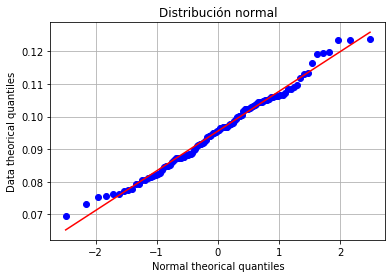

In [129]:
st.probplot(profesional['Mujer_noprof_Ptg'],dist="norm",plot=plt)
plt.grid()
plt.title('Distribución normal')
plt.xlabel('Normal theorical quantiles')
plt.ylabel('Data theorical quantiles')
plt.show()

#### Nodo 4: Simulación.

### 1.7 Visualización de resultados de simulación. (segunda entrega)
> Se deben simular al menos 4  "nodos" o "escenarios" en tu problema. Para la segunda entrega debes haber elaborado un programa que simule dos de ellos, los primeros dos de tu diagrama.
> Para la entrega final deben de tener los 4 nodos con todas sus simulaciones.

### 1.6 Conclusiones. ( a partir de segunda entrega)
> Mucho cuidado, las conclusiones no son cualquier cosa. Se debe concluir respecto a los objetivos planteados de acuerdo a los resultados obtenidos.

### 1.7 Referencias. 
> INEGI. (2000 al 2018). Consulta de Homicidios en México. 22 marzo 2020, de INEGI Sitio web: https://www.inegi.org.mx/sistemas/olap/consulta/general_ver4/MDXQueryDatos.asp?#Regreso&c=

___
## 2. Especificaciones adicionales.
En el grupo deben haber mínimo dos integrantes y máximo tres integrantes. Para propósitos logísticos nada más, por favor enumérense como *integrante 1*, *integrante 2* e *integrante 3*.

### 2.1 Notebook de jupyter. 
> Los anteriores numerales los deben desarrollar todos en un notebook de jupyter y llamarlo de la siguiente manera `ProyectoModulo1_ApellidoN1_ApellidoN2_ApellidoN3`, donde `ApellidoNi` hace referencia al apellido materno y la inicial del primer nombre del integrante `i`.

### 2.2 Proyecto en `GitHub`.
> El integrante 1 deberá crear un proyecto en `GitHub` llamado **proyecto_modulo1**, donde tendrán todos los archivos relacionados con el proyecto. Los demás integrantes deben hacer un *fork* del proyecto, seguir el proyecto principal con `GitKraken` y hacer al menos dos contribuciones con *pull request* (como se hizo en la tarea). En el proyecto, deben incluir el repositorio remoto del integrante 1.

### 2.3 Presentación.
> Recuerden que la nota del proyecto es mitad el trabajo, y mitad la presentación. Deben hacer una presentación ya sea en power point o utlizando un notebook de python para presentar el trabajo durante un horario de clase que se será posteriomente definido. La presentación, además de llevar todos los componentes básicos descritos en el entregable, debe llevar una tabla de contenido.
> - Presentación: 10 minutos.
> - Seguir estas recomendaciones: https://es.slideshare.net/MeireComputacion/power-point-pautas-para-una-buen-trabajo

In [2]:
from numpy import histogram as nphistogram
#from numpy import array, linspace, zeros, ones, ones_like
#import numpy as np
#import matplotlib.pyplot as plt
#from matplotlib.pyplot import figure, hist, plot, ion, axes, title
from JSAnimation.IPython_display import display_animation, anim_to_html

from matplotlib import animation as animation


def getHistBinNumAni(data,totalframes=None,showpts=True):
    #ion()
    if totalframes is None:
        totalframes = min(len(data)-1,100)
    fig = figure()
    ax = fig.gca()

    n, bins, patches = hist(data, totalframes, density=1, facecolor='green', alpha=0.0)
    if showpts:
        junk = plot(data,0.2*ones_like(data),'bo')
    def animate(i):
        n, bins = nphistogram(data, i+1, density=False)
        #print n
        ax.set_ylim(0,1.1*n.max())
        for j in range(len(n)):
            rect,h = patches[j],n[j]
            #print h.max()
            x = bins[j]
            w = bins[j+1] - x
            rect.set_height(h)
            rect.set_x(x)
            rect.set_width(w)
            rect.set_alpha(0.75)
        #fig.canvas.draw()
    
    ani = animation.FuncAnimation(fig, animate, totalframes, repeat=False)
    return ani

def getHistBinOffsetAni(data,nbins=20,showpts=True):
    offsets = linspace(-0.5,0.5,50)
    totalframes = len(offsets)
    fig = figure()
    ax = fig.gca()

    n, _bins, patches = hist(data, nbins, density=1, facecolor='green', alpha=0.0)
    if showpts:
        junk = plot(data,0.2*ones_like(data),'bo')
    # Obnoxious: find max number in a bin ever
    nmax = 1
    for i in range(totalframes):
        dx = (data.max() - data.min())/nbins
        _bins = linspace(data.min() - dx + offsets[i]*dx, data.max()+dx + offsets[i]*dx,len(data)+1)
        n, bins = nphistogram(data, bins=_bins, density=False)
        nmax = max(nmax,n.max())
                               
    def animate(i):
        dx = (data.max() - data.min())/nbins
        # bins go from min - dx to max + dx, then offset.
        _bins = linspace(data.min() - dx + offsets[i]*dx, data.max()+dx + offsets[i]*dx,nbins)
        n, bins = nphistogram(data, bins = _bins, density=False)
        ax.set_ylim(0,1.1*nmax)
        #ax.set_xlim(data.min()-dx,data.max()+dx)
        binwidth = bins[1] - bins[0]
        ax.set_xlim(bins[0]-binwidth,bins[-1] + binwidth)

        for j in range(len(n)):
            #continue
            rect,h = patches[j],n[j]
            #print h.max()
            x = bins[j]
            w = bins[j+1] - x
            rect.set_height(h)
            rect.set_x(x)
            rect.set_width(w)
            rect.set_alpha(0.75)
        fig.canvas.draw()    
    ani = animation.FuncAnimation(fig, animate, totalframes, repeat=False)
    return ani
#!/usr/bin/env python

from numpy import sqrt, pi, exp

def getKdeGaussianAni(data,totalframes=100, showpts=True):
    fig = figure()
    
    # Let's say 10000 points for the whole thing
    width = data.max() - data.min()
    left, right = data.min(), data.min() + (width)
    left, right = left - (totalframes/100)*width, right + (totalframes/100)*width
    
    ax = axes(xlim=(left,right),ylim=(-0.1,2))
    line, = ax.plot([], [], lw=2)
    if showpts:
        junk = plot(data,ones_like(data)*0.1,'go')

    
    numpts = 10000
    x = linspace(left,right,numpts)
    
    dx = (right-left)/(numpts-1)
    
    def init():
        line.set_data([], [])
        return line,
    
    def gaussian(x,sigma,mu):
        # Why isn't this defined somewhere?! It must be!
        return (1/sqrt(2*pi*sigma**2)) *  exp(-((x-mu)**2)/(2*sigma**2))
    
    def animate(i):
        y = zeros(10000)
        kernelwidth = .02*width*(i+1)
        kernelpts = int(kernelwidth/dx)
        kernel = gaussian(linspace(-3,3,kernelpts),1,0)
        #kernel = ones(kernelpts)
        for d in data:
            center = d - left
            centerpts = int(center/dx)
            bottom = centerpts - int(kernelpts/2)
            top = centerpts+int(kernelpts/2)
            if top - bottom < kernelpts: top = top + 1
            if top - bottom > kernelpts: top = top - 1
            y[bottom:top] += kernel
        ax.set_xlim(x[where(y>0)[0][0]],x[where(y>0)[0][-1]])
        line.set_data(x,y)
        ax.set_ylim(min(0,y.min()),1.1*y.max())
        #title('ymin %s ymax %s'%(y.min(),y.max()))

    
        #sleep(0.1)
        return line,
    ani = animation.FuncAnimation(fig, animate, init_func=init,
                                  frames=totalframes, repeat=False)
    return ani
#FACTOR ME for rect and gaussian
def getKdeRectAni(data,totalframes=100,showpts=True):
    #ion()
    totalframes = 100
    fig = figure()
    
    # Let's say 10000 points for the whole thing
    width = data.max() - data.min()
    left, right = data.min(), data.min() + (width)
    left, right = left - (totalframes/100)*width, right + (totalframes/100)*width
    
    ax = axes(xlim=(left,right),ylim=(-0.1,2))
    line, = ax.plot([], [], lw=2)
    
    numpts = 10000
    x = linspace(left,right,numpts)
    
    dx = (right-left)/(numpts-1)
    
    def init():
        line.set_data([], [])
        return line,

    if showpts:
        junk = plot(data,0.2*ones_like(data),'bo')
    
    def animate(i):
        y = zeros(10000)
        kernelwidth = .02*width*(i+1)
        kernelpts = int(kernelwidth/dx)
        kernel = ones(kernelpts)
        for d in data:
            center = d - left
            centerpts = int(center/dx)
            bottom = centerpts - int(kernelpts/2)
            top = centerpts+int(kernelpts/2)
            if top - bottom < kernelpts: top = top + 1
            if top - bottom > kernelpts: top = top - 1
            y[bottom:top] += kernel
        line.set_data(x,y)
        ax.set_ylim(0,1.1*y.max())
        ax.set_xlim(x[where(y>0)[0][0]],x[where(y>0)[0][-1]])
    
        #sleep(0.1)
        return line,
    ani = animation.FuncAnimation(fig, animate, init_func=init,
                                  frames=totalframes, repeat=False)
    return ani


<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">

</footer>